В данной домашней работе все задачи — практические. В них необходимо попытаться применить
все возможные инструменты, которые мы изучали, чтобы ответить на заданный в задаче вопрос.
Не забывайте об одном из самых важных инструментов — визуализации. Ваши решения необходимо
сопроводить краткими комментариями и выводами, которые Вы сделали на основе анализа.

Все сопутсвующие файлы находятся в папке hw_2_data

**Упражнение 1.** В файле anorexia.txt записан вес пациентов до начала терапии анорексии и после ее окончания. Была ли терапия в эффективна?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

/Users/akimkalenuk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
df = pd.read_csv('hw_2_data/anorexia.txt', sep='\t')
df

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4
5,88.7,103.6
6,94.9,98.4
7,76.3,93.4
8,81.0,73.4
9,80.5,82.1


In [6]:
df['diff'] = df['Before'] - df['After']

In [7]:
mean_diff = df['diff'].mean()
std_diff = df['diff'].std()
print(f"mean_diff: {mean_diff:.2f} кг")
print(f"std_diff: {std_diff:.2f} кг")

mean_diff: -3.01 кг
std_diff: 7.31 кг


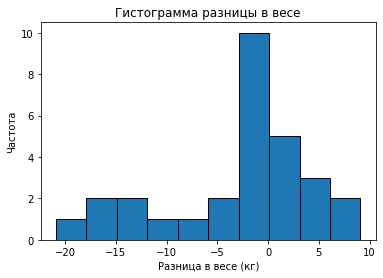

In [8]:
plt.hist(df['diff'], bins=10, edgecolor='black')
plt.title('Гистограмма разницы в весе')
plt.xlabel('Разница в весе (кг)')
plt.ylabel('Частота')
plt.show()

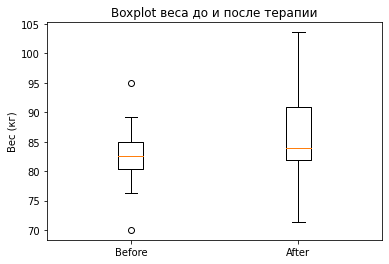

In [9]:
plt.boxplot([df['Before'], df['After']], labels=['Before', 'After'])
plt.title('Boxplot веса до и после терапии')
plt.ylabel('Вес (кг)')
plt.show()

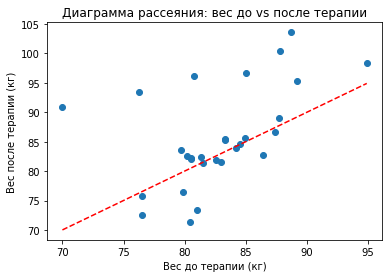

In [23]:
plt.scatter(df['Before'], df['After'])
plt.plot([df['Before'].min(), df['Before'].max()], [df['Before'].min(), df['Before'].max()], 'r--')
plt.title('Диаграмма рассеяния: вес до vs после терапии')
plt.xlabel('Вес до терапии (кг)')
plt.ylabel('Вес после терапии (кг)')
plt.show()

In [42]:
shapiro_stat_A, shapiro_p_A = stats.shapiro(df['Before'])
shapiro_stat_B, shapiro_p_B = stats.shapiro(df['After'])
print(f"Группа A - статистика Шапиро-Уилка: {shapiro_stat_A:.4f}, p-значение: {shapiro_p_A:.4f}")
print(f"Группа B - статистика Шапиро-Уилка: {shapiro_stat_B:.4f}, p-значение: {shapiro_p_B:.4f}")

Группа A - статистика Шапиро-Уилка: 0.9699, p-значение: 0.5580
Группа B - статистика Шапиро-Уилка: 0.9520, p-значение: 0.2057


Наблюдения имеют нормальное распределение

Проверим применимость стат тестов для наших денных. Проведем **AA-тесты**.

In [30]:
before_weights = np.array(df['Before'])

num_tests = 10000  
alpha = 0.05      
significant_results = 0  

def perform_aa_test(data):
    shuffled_data = np.random.permutation(data)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:]
    t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)
    return p_value

for _ in range(num_tests):
    p_val = perform_aa_test(before_weights)
    if p_val < alpha:
        significant_results += 1

type_I_error_rate = significant_results / num_tests * 100
print(f"Частота ошибки первого рода: {type_I_error_rate:.2f}%")

Частота ошибки первого рода: 4.92%


In [39]:
significant_results = 0
num_tests = 10000

def perform_ab_test(data):
    shuffled_data = np.random.permutation(data)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:] - mean_diff 
    t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)
    return p_value

for _ in range(num_tests):
    p_val = perform_aa_test(before_weights)
    if p_val < alpha:
        significant_results += 1

power_rate = significant_results / num_tests * 100
print(f"Мощность: {power_rate:.2f}%")

Мощность: 33.98%


t-test применим для наших данных, но в то же время для данной разницы, у него низкая мощность

In [41]:
t_stat_ind, p_value_ind = stats.ttest_ind(df['Before'], df['After'], equal_var=False)
print(f"t-статистика : {t_stat_ind:.2f}, p-значение: {p_value_ind:.4f}")

t-статистика : -1.68, p-значение: 0.1005


не найдено стат значимых различий

Посмотрим другие критерии

In [43]:
significant_results_mw = 0

for _ in range(num_tests):
    shuffled_data = np.random.permutation(before_weights)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:]
    u_stat, p_value_mw = stats.mannwhitneyu(group_A, group_B, alternative='two-sided')
    if p_value_mw < alpha:
        significant_results_mw += 1

type_I_error_rate_mw = significant_results_mw / num_tests * 100
print(f"Частота ошибки первого рода (Манна-Уитни): {type_I_error_rate_mw:.2f}%")

Частота ошибки первого рода (Манна-Уитни): 4.86%


In [45]:
significant_results_mw = 0

for _ in range(num_tests):
    shuffled_data = np.random.permutation(before_weights)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:] - mean_diff
    u_stat, p_value_mw = stats.mannwhitneyu(group_A, group_B, alternative='two-sided')
    if p_value_mw < alpha:
        significant_results_mw += 1

power_mw = significant_results_mw / num_tests * 100
print(f"Мощность (Манна-Уитни): {power_mw:.2f}%")

Мощность (Манна-Уитни): 32.79%


In [46]:
u_stat, p_value_mannwhitney = stats.mannwhitneyu(df['Before'], df['After'], alternative='two-sided')
print(f"Статистика теста Манна-Уитни: {u_stat}, p-значение: {p_value_mannwhitney:.4f}")

Статистика теста Манна-Уитни: 320.5, p-значение: 0.1218


не найдено стат значимых различий

**Упражнение 2.** В файле weights.txt записан вес пациентов мужского и женского
пола. Есть ли значимые различия в весе мужчин и женщин?

In [47]:
df = pd.read_csv('hw_2_data/weights.txt', sep='\t')
df

,Group,Weight
0,Woman,38.9
1,Woman,61.2
2,Woman,73.3
3,Woman,21.8
4,Woman,63.4
5,Woman,64.6
6,Woman,48.4
7,Woman,48.8
8,Woman,48.5
9,Woman,50.1


In [49]:
women_weights = df[df['Group'] == 'Woman']['Weight']
men_weights = df[df['Group'] == 'Man']['Weight']

mean_women = women_weights.mean()
std_women = women_weights.std()
mean_men = men_weights.mean()
std_men = men_weights.std()

print(f"Средний вес женщин: {mean_women:.2f} кг, стандартное отклонение: {std_women:.2f} кг")
print(f"Средний вес мужчин: {mean_men:.2f} кг, стандартное отклонение: {std_men:.2f} кг")

Средний вес женщин: 51.90 кг, стандартное отклонение: 14.72 кг
Средний вес мужчин: 68.96 кг, стандартное отклонение: 9.03 кг


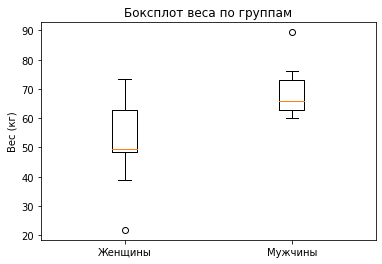

In [50]:
plt.boxplot([women_weights, men_weights], labels=['Женщины', 'Мужчины'])
plt.title('Боксплот веса по группам')
plt.ylabel('Вес (кг)')
plt.show()

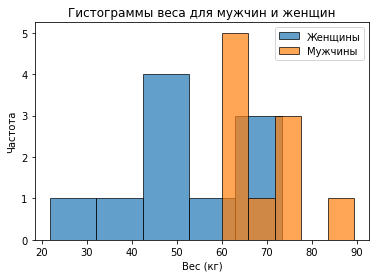

In [51]:
plt.hist(women_weights, bins=5, alpha=0.7, label='Женщины', edgecolor='black')
plt.hist(men_weights, bins=5, alpha=0.7, label='Мужчины', edgecolor='black')
plt.title('Гистограммы веса для мужчин и женщин')
plt.xlabel('Вес (кг)')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [52]:
shapiro_women_stat, shapiro_women_p = stats.shapiro(women_weights)
shapiro_men_stat, shapiro_men_p = stats.shapiro(men_weights)

print(f"Женщины - статистика Шапиро-Уилка: {shapiro_women_stat:.4f}, p-значение: {shapiro_women_p:.4f}")
print(f"Мужчины - статистика Шапиро-Уилка: {shapiro_men_stat:.4f}, p-значение: {shapiro_men_p:.4f}")

Женщины - статистика Шапиро-Уилка: 0.9408, p-значение: 0.5618
Мужчины - статистика Шапиро-Уилка: 0.8679, p-значение: 0.0944


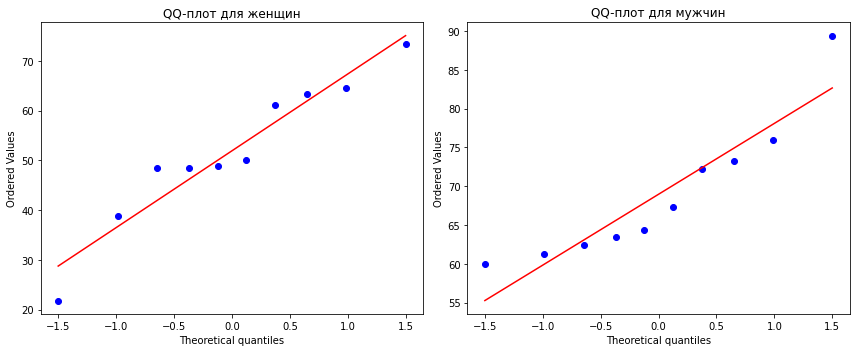

In [53]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(women_weights, dist="norm", plot=plt)
plt.title('QQ-плот для женщин')

plt.subplot(1, 2, 2)
stats.probplot(men_weights, dist="norm", plot=plt)
plt.title('QQ-плот для мужчин')

plt.tight_layout()
plt.show()

данные распрелены нормально

In [56]:
num_tests = 10000  
alpha = 0.05      
significant_results = 0  

def perform_aa_test(data):
    shuffled_data = np.random.permutation(data)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:]
    t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)
    return p_value

for _ in range(num_tests):
    p_val = perform_aa_test(women_weights)
    if p_val < alpha:
        significant_results += 1

type_I_error_rate = significant_results / num_tests * 100
print(f"Частота ошибки первого рода: {type_I_error_rate:.2f}%")

Частота ошибки первого рода: 3.00%


In [59]:
num_tests = 10000  
alpha = 0.05      
significant_results = 0  

def perform_aa_test(data):
    shuffled_data = np.random.permutation(data)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:]
    t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)
    return p_value

for _ in range(num_tests):
    p_val = perform_aa_test(men_weights)
    if p_val < alpha:
        significant_results += 1

type_I_error_rate = significant_results / num_tests * 100
print(f"Частота ошибки первого рода: {type_I_error_rate:.2f}%")

Частота ошибки первого рода: 2.43%


In [63]:
num_tests = 10000  
alpha = 0.05      
significant_results = 0  

def perform_aa_test(data):
    shuffled_data = np.random.permutation(data)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:] - 3
    t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)
    return p_value

for _ in range(num_tests):
    p_val = perform_aa_test(men_weights)
    if p_val < alpha:
        significant_results += 1

power = significant_results / num_tests * 100
print(f"Power: {power:.2f}%")

Power: 4.54%


In [72]:
t_stat_ind, p_value_ind = stats.ttest_ind(women_weights, men_weights, equal_var=False)
print(f"t-статистика : {t_stat_ind:.2f}, p-значение: {p_value_ind:.4f}")

t-статистика : -3.12, p-значение: 0.0070


In [66]:
significant_results_mw = 0

for _ in range(num_tests):
    shuffled_data = np.random.permutation(men_weights)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:]
    u_stat, p_value_mw = stats.mannwhitneyu(group_A, group_B, alternative='two-sided')
    if p_value_mw < alpha:
        significant_results_mw += 1

type_I_error_rate_mw = significant_results_mw / num_tests * 100
print(f"Частота ошибки первого рода (Манна-Уитни): {type_I_error_rate_mw:.2f}%")

Частота ошибки первого рода (Манна-Уитни): 3.34%


In [67]:
significant_results_mw = 0

for _ in range(num_tests):
    shuffled_data = np.random.permutation(men_weights)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:] - 3
    u_stat, p_value_mw = stats.mannwhitneyu(group_A, group_B, alternative='two-sided')
    if p_value_mw < alpha:
        significant_results_mw += 1

power_mw = significant_results_mw / num_tests * 100
print(f"power (Манна-Уитни): {power_mw:.2f}%")

power (Манна-Уитни): 5.44%


У Манна-Уитни мощность будет повыше, чем у t-test

In [70]:
u_stat, p_value_mannwhitney = stats.mannwhitneyu(men_weights, women_weights, alternative='two-sided')
print(f"Статистика теста Манна-Уитни: {u_stat}, p-значение: {p_value_mannwhitney:.4f}")

Статистика теста Манна-Уитни: 83.0, p-значение: 0.0139


Есть стат. значимые различия между весом у мужчин и женщин

**Упражнение 3.** В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились
ли в среднем цены в этом районе за год?

In [73]:
data = pd.read_csv('hw_2_data/seattle.txt', sep="\t")

In [74]:
data_2001 = data[data['Year'] == 2001]['Price']
data_2002 = data[data['Year'] == 2002]['Price']

mean_2001 = data_2001.mean()
std_2001 = data_2001.std()
mean_2002 = data_2002.mean()
std_2002 = data_2002.std()

print(f"Средняя цена в 2001 году: {mean_2001:.2f}, стандартное отклонение: {std_2001:.2f}")
print(f"Средняя цена в 2002 году: {mean_2002:.2f}, стандартное отклонение: {std_2002:.2f}")

Средняя цена в 2001 году: 288.93, стандартное отклонение: 157.78
Средняя цена в 2002 году: 329.26, стандартное отклонение: 316.83


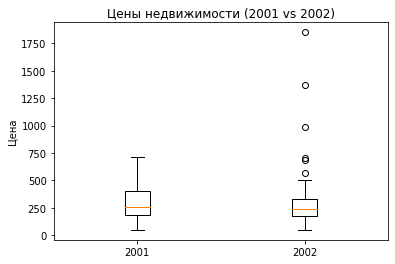

In [75]:
plt.boxplot([data_2001, data_2002], labels=['2001', '2002'])
plt.title('Цены недвижимости (2001 vs 2002)')
plt.ylabel('Цена')
plt.show()

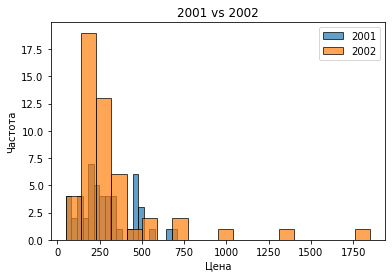

In [76]:
plt.hist(data_2001, bins=20, alpha=0.7, label='2001', edgecolor='black')
plt.hist(data_2002, bins=20, alpha=0.7, label='2002', edgecolor='black')
plt.title('2001 vs 2002')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.legend()
plt.show()

Уже по боксплоту и гистограмме можно увидеть, что нет различий между этими группами, но проведем тесты...

In [77]:
shapiro_2001_stat, shapiro_2001_p = stats.shapiro(data_2001)
shapiro_2002_stat, shapiro_2002_p = stats.shapiro(data_2002)

print(f"Тест Шапиро-Уилка для 2001 года: p-значение = {shapiro_2001_p:.4f}")
print(f"Тест Шапиро-Уилка для 2002 года: p-значение = {shapiro_2002_p:.4f}")

Тест Шапиро-Уилка для 2001 года: p-значение = 0.0394
Тест Шапиро-Уилка для 2002 года: p-значение = 0.0000


In [81]:
levene_stat, levene_p = stats.levene(data_2001, data_2002)
print(f"Тест Левена: p-значение = {levene_p:.4f}")

Тест Левена: p-значение = 0.4449


In [80]:
num_tests = 10000  
alpha = 0.05      
significant_results = 0  

def perform_aa_test(data):
    shuffled_data = np.random.permutation(data)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:]
    t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)
    return p_value

for _ in range(num_tests):
    p_val = perform_aa_test(data_2001)
    if p_val < alpha:
        significant_results += 1

type_I_error_rate = significant_results / num_tests * 100
print(f"Частота ошибки первого рода: {type_I_error_rate:.2f}%")

Частота ошибки первого рода: 4.88%


In [87]:
num_tests = 10000  
alpha = 0.05      
significant_results = 0  

def perform_aa_test(data):
    shuffled_data = np.random.permutation(data)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:] + 40
    t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)
    return p_value

for _ in range(num_tests):
    p_val = perform_aa_test(data_2001)
    if p_val < alpha:
        significant_results += 1

power = significant_results / num_tests * 100
print(f"Мощность: {power:.2f}%")

Мощность: 13.89%


данные распределены ненормально, что в целом и логично, так как это цены, но это не мешает нам применять t-test, так как данных достаточно для обеспечения ошибки первого рода в районе 5%, мощность для изменения в 40 денежных единиц 13.89%, что мало

In [83]:
t_stat, p_value = stats.ttest_ind(data_2001, data_2002, equal_var=False)
print(f"t-статистика: {t_stat:.2f}, p-значение: {p_value:.4f}")

t-статистика: -0.81, p-значение: 0.4231


In [88]:
num_tests = 10000  
alpha = 0.05      
significant_results = 0  

def perform_aa_test(data):
    shuffled_data = np.random.permutation(data)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:] 
    t_stat, p_value = stats.mannwhitneyu(group_A, group_B, alternative='two-sided')
    return p_value

for _ in range(num_tests):
    p_val = perform_aa_test(data_2001)
    if p_val < alpha:
        significant_results += 1

type_I_error_rate = significant_results / num_tests * 100
print(f"Частота ошибки первого рода: {type_I_error_rate:.2f}%")

Частота ошибки первого рода: 4.43%


In [89]:
num_tests = 10000  
alpha = 0.05      
significant_results = 0  

def perform_aa_test(data):
    shuffled_data = np.random.permutation(data)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:] + 40
    t_stat, p_value = stats.mannwhitneyu(group_A, group_B, alternative='two-sided')
    return p_value

for _ in range(num_tests):
    p_val = perform_aa_test(data_2001)
    if p_val < alpha:
        significant_results += 1

power = significant_results / num_tests * 100
print(f"Мощность: {power:.2f}%")

Мощность: 13.52%


In [90]:
u_stat, p_value_mw = stats.mannwhitneyu(data_2001, data_2002, alternative='two-sided')
print(f"Статистика Манна-Уитни: {u_stat}, p-значение: {p_value_mw:.4f}")

Статистика Манна-Уитни: 1295.5, p-значение: 0.7564


Таким образом, не найдено стат значимых различий в ценах между 2001 и 2002 годом

**Упражнение 4.** В рамках исследования эффективности препарата метилфенидат пациенты с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и
после недельного курса каждый испытуемые проходили второй тест. Был ли эффект от применения
препарата? Данные находятся в файле methylphenidate.txt.

In [94]:
data = pd.read_csv('hw_2_data/methylphenidate.txt', sep=" ")
data

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38
5,38,36
6,71,77
7,33,51
8,34,45
9,53,42


In [95]:
placebo = data['Placebo']
methylphenidate = data['Methylphenidate']

differences = methylphenidate - placebo

In [92]:
mean_placebo = placebo.mean()
std_placebo = placebo.std()
mean_methylphenidate = methylphenidate.mean()
std_methylphenidate = methylphenidate.std()
mean_difference = differences.mean()

print(f"Средний результат (плацебо): {mean_placebo:.2f}, стандартное отклонение: {std_placebo:.2f}")
print(f"Средний результат (метилфенидат): {mean_methylphenidate:.2f}, стандартное отклонение: {std_methylphenidate:.2f}")
print(f"Средняя разница: {mean_difference:.2f}")

Средний результат (плацебо): 39.75, стандартное отклонение: 11.31
Средний результат (метилфенидат): 44.71, стандартное отклонение: 12.32
Средняя разница: 4.96


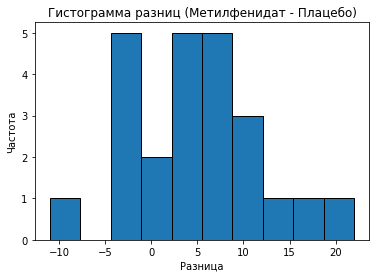

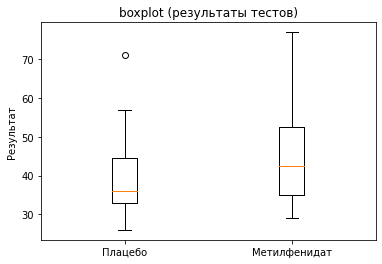

In [93]:
plt.hist(differences, bins=10, edgecolor='black')
plt.title('Гистограмма разниц (Метилфенидат - Плацебо)')
plt.xlabel('Разница')
plt.ylabel('Частота')
plt.show()

plt.boxplot([placebo, methylphenidate], labels=['Плацебо', 'Метилфенидат'])
plt.title('boxplot (результаты тестов)')
plt.ylabel('Результат')
plt.show()

In [96]:
shapiro_stat, shapiro_p = stats.shapiro(differences)
print(f"Тест Шапиро-Уилка для разниц: p-значение = {shapiro_p:.4f}")

Тест Шапиро-Уилка для разниц: p-значение = 0.8923


In [99]:
num_tests = 10000  
alpha = 0.05      
significant_results = 0  

def perform_aa_test(data):
    shuffled_data = np.random.permutation(data)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:] 
    t_stat, p_value = stats.ttest_rel(group_A, group_B)
    return p_value

for _ in range(num_tests):
    p_val = perform_aa_test(placebo)
    if p_val < alpha:
        significant_results += 1

type_I_error_rate = significant_results / num_tests * 100
print(f"Частота ошибки первого рода: {type_I_error_rate:.2f}%")

Частота ошибки первого рода: 4.74%


In [102]:
num_tests = 10000  
alpha = 0.05      
significant_results = 0  

def perform_aa_test(data):
    shuffled_data = np.random.permutation(data)
    midpoint = len(shuffled_data) // 2
    group_A = shuffled_data[:midpoint]
    group_B = shuffled_data[midpoint:] + mean_difference
    t_stat, p_value = stats.ttest_rel(group_A, group_B)
    return p_value

for _ in range(num_tests):
    p_val = perform_aa_test(placebo)
    if p_val < alpha:
        significant_results += 1

power = significant_results / num_tests * 100
print(f"power: {power:.2f}%")

power: 15.70%


In [103]:
t_stat, p_value = stats.ttest_rel(methylphenidate, placebo)
print(f"t-тест: t-статистика = {t_stat:.2f}, p-значение = {p_value:.4f}")

t-тест: t-статистика = 3.22, p-значение = 0.0038


Наблюдается стат значимый эффект от применения препарата